<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


## **Land usage classification in Agriculture**


Estaimted time needed: **2** hours


## Abstract


In this laboratory, we will explore how land use types can be classified based on aerial and satellite photographs of the earth's surface. We will learn to build our own photo masks based on ready-made masks and display them on the screen.


## Introduction


Determining how land is used is a huge problem today. After all, its improper and illegal use can lead to both economic and natural disasters. One of the ways to assess the use is the analysis of aerial and satellite images of the earth's surface. A big problem is to build a mathematical model that can determine the type of land use based on colors. If you have ready-made photos and masks of land use, you can use the methods of artificial intelligence and big data to build a model-classifier.

In this lab, we will learn how to upload photos, transform pixels and colors into a data set. Then we will learn how to build a classifier and predict land use masks based on it.


## Materials and methods


In this lab, we will learn the basic methods of images transformation classification. The laboratory consists of four stages:
* Download and visualization of images
* DataSet creation
* Classification model creation
* Create your own mask of land use


The statistical data was obtained from https://www.kaggle.com/humansintheloop/semantic-segmentation-of-aerial-imagery under [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01) license.


## Prerequisites
* [Python](https://www.python.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01) - basic level
* [numpy](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01) - middle level
* [SeaBorn](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01) - basic level
* [Matplotlib](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01) - basic level
* [scikit-learn](https://scikit-learn.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01) - middle level
* [pandas](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01) - basic level


## Objectives


After completing this lab, you will be able to:


* Download and transform images.
* Create a DataSet of the colors of images.
* Build a classification model.
* Build land use masks based on a classifier.


# Download and visualization of images


## Install the required libraries 


We need to install additional libraries and upgrade existing ones in the lab.


In [ ]:
# conda install matplotlib >= 3.4

In [ ]:
# conda config --add channels conda-forge

In [ ]:
# conda install scikit-learn

In [ ]:
# conda install -c conda-forge opencv 

In [ ]:
# conda install -c conda-forge colormap

In [ ]:
# conda install -c intel scikit-learn

## Import the required libraries 


We will use libraries os and glob to work with files and folders. 
We will also use Matplotlib and Seaborn for visualizing our dataset to gain a better understanding of the images we are going to be handling.
NumPy will be used for arrays of images. Scikit-Learn - for classical classification models. Pandas - for DataSet creation.


In [1]:
import seaborn as sns
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import os
from glob import glob
import json
from PIL import Image
from colormap import rgb2hex, hex2rgb

#Classifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import ConfusionMatrixDisplay

## Loading of data


For convenience, let's create a function that downloads all and displays the last images of land and masks from a specified directory.
All training pictures and their masks have to be placed in differend directories.
Separate a csv file that contains the description of land use classes.

The function has to work in the following way:
1. Download a csv file **[json.load()](https://docs.python.org/3/library/json.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01)** and display classes description.
2. Download all images from a specific directory:
 **[Image.open()](https://pillow.readthedocs.io/en/stable/reference/Image.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01)**.
3. Display the last image + mask.
4. Form and return a DataSet that has to be an array of tuples [image, mask].

Remark: the downloaded directories contain 72 images and their masks located in different subfolders according to image resolutions. Due to the fact that the dataset for training will represent each point in the form of a separate record - the size of the dataset will be too large to conduct the training on a local computer. Therefore, we will select a separate folder that contains 9 photos and their masks.


In [ ]:
import skillsnetwork

await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/data-science-in-agriculture-land-use-classification/Semantic_segmentation_dataset.zip", overwrite=True)

In [6]:
def get_data(folder, file):
    # download json
    f = open(folder + "/" + file,)
    data = json.load(f)
    f.close()
    cl = {}
    # Create a dictionary with classes
    for i, c in enumerate(data['classes']):
        cl[i] = dict(c)
        
    for k, v in cl.items():
        print('Class', k)
        for k2, v2 in v.items():
            print("   ", k2, v2)
    data = []
    
    # download images
    sd = [item for item in os.listdir(folder) if os.path.isdir(folder + '/' + item)] # a list of subdirectories
    print("Subdirectories: ", sd)
    for f in sd[0:2]: #choose one of the subdirectories to download
        print("Downloading: ", f)
        images = glob(folder + "/" + f + "/images" + "/*.jpg") # create a list of image files
        for im in images:
            mask_f = im.replace("images", "masks").replace("jpg", "png") # create a list of mask files
            image = Image.open(im) 
            mask = Image.open(mask_f)
            if len(np.array(mask).shape) > 2:
                data.append([image, mask])
        fig = plt.figure(figsize = (10,10)) #display the last image + mask
        plt.subplot(1,2,1)
        plt.imshow(image)
        plt.subplot(1,2,2)
        plt.imshow(mask)
        plt.show()

    return (data)

Class 0
    title Water
    shape polygon
    color #50E3C2
    geometry_config {}
Class 1
    title Land (unpaved area)
    shape polygon
    color #F5A623
    geometry_config {}
Class 2
    title Road
    shape polygon
    color #DE597F
    geometry_config {}
Class 3
    title Building
    shape polygon
    color #D0021B
    geometry_config {}
Class 4
    title Vegetation
    shape polygon
    color #417505
    geometry_config {}
Class 5
    title Unlabeled
    shape polygon
    color #9B9B9B
    geometry_config {}
Subdirectories:  ['Tile 1', 'Tile 2', 'Tile 3', 'Tile 4', 'Tile 5', 'Tile 6', 'Tile 7', 'Tile 8']
Downloading:  Tile 1


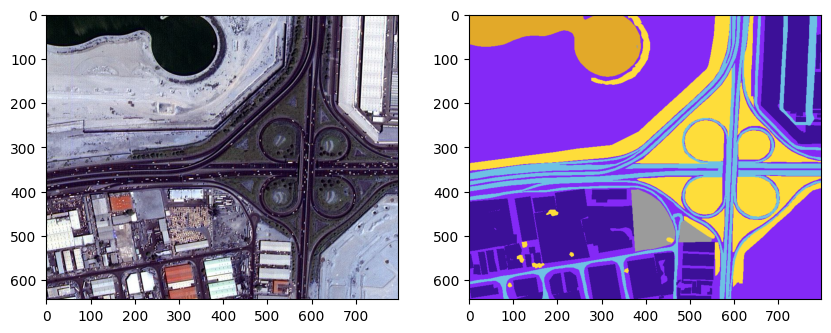

Downloading:  Tile 2


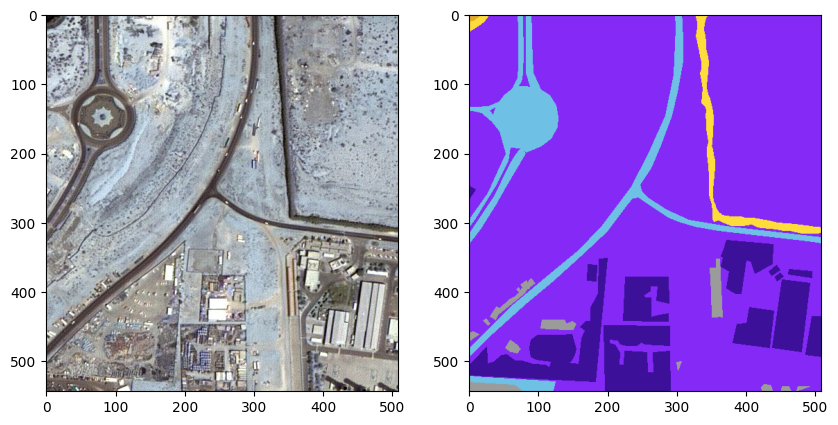

In [7]:
d = "Semantic segmentation dataset"
f = "classes.json"
data = get_data(d, f)

As you can see, the csv file contains a description of 6 land use classes. Each class has its own color in the mask file.
We downloaded all the pictures and their masks from a separate directory and formed a set of data lists consisting of tuples of picture-mask.


# DataSet creation


Let's see how many images we downloaded:


In [8]:
len(data)

9

As you can see, we dowloaded 9 images.
Let's use first 4 images and masks for training and last 5 - for tests.

Let's make a function that will create a DataSet.

Each image is a set of points. Each point is represented by a tuple of RGB (red, green, blue). Every color is a number [0-1) for float or [0, 255) for int. 
Therefore, every image is a 3D array (height, width, color). Or a 2D array for gray scale.

To establish the dependence of color -> land use class, we need to convert each image into a dataset of the form (r, g, b) -> class.

To do this, we need to transform the image into a color matrix **[np.asarray()](https://numpy.org/doc/stable/reference/generated/numpy.asarray.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01)**, and then transform it into a one-dimensional form **[np.flatten()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.flatten.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01)**.
To construct the output field, we need to additionally convert the color tuple (r, g, b) from the mask file into hex format: **[rgb2hex()](https://pythonhosted.org/colormap/references.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01)**.


In [26]:
def create_DataSet(data):
    DS = pd.DataFrame()
    for image, mask in data:
        # transform image to matrix
        im = np.asarray(image) 
        mk = np.asarray(mask)
        # transform a one-dimension array of r, g, b colors
        red = im[:,:,0].flatten()
        green = im[:,:,1].flatten()
        blue = im[:,:,2].flatten()
        im_f = np.array([red, green, blue])
        red = mk[:,:,0].flatten()
        green = mk[:,:,1].flatten()
        blue = mk[:,:,2].flatten()
        # calculate hex classes
        h = np.array([rgb2hex(*m) for m in zip(red, green, blue)])
        mk_f = np.array([red, green, blue, h])      
        d = np.concatenate((im_f, mk_f), axis=0)
        # create a DataSet
        DS_new = pd.DataFrame(np.transpose(d), columns = ['Im_Red', 'Im_Green', 'Im_Blue', 'Mk_Red', 'Mk_Green', 'Mk_Blue', 'HEX'])
        if len(DS) == 0:
            DS = DS_new
        else:
            DS = pd.concat([DS, DS_new], ignore_index=True)
    return DS

<details><summary>Click <b>here</b> for the solution</summary> <code>
        red = mk[:,:,0].flatten()
        green = mk[:,:,1].flatten()
        blue = mk[:,:,2].flatten()
</code></details>


In [27]:
print("Create a training DataSet")
train = create_DataSet(data[:30])
print(train)
print("Create a test DataSet")
test = create_DataSet(data[30:])
print(test)

Create a training DataSet
         Im_Red Im_Green Im_Blue Mk_Red Mk_Green Mk_Blue      HEX
0           190      195     201    132       41     246  #8429F6
1           214      219     225    132       41     246  #8429F6
2           228      232     241    132       41     246  #8429F6
3           242      246     255    132       41     246  #8429F6
4           251      255     255    132       41     246  #8429F6
...         ...      ...     ...    ...      ...     ...      ...
21537118     36       39      46    254      221      58  #FEDD3A
21537119     34       37      44    254      221      58  #FEDD3A
21537120     37       40      45    254      221      58  #FEDD3A
21537121     34       37      42    254      221      58  #FEDD3A
21537122     33       36      41    254      221      58  #FEDD3A

[21537123 rows x 7 columns]
Create a test DataSet
        Im_Red Im_Green Im_Blue Mk_Red Mk_Green Mk_Blue      HEX
0          156      144     146    110      193     228  #6EC1E4
1

<details><summary>Click <b>here</b> for the solution</summary> <code>
print("Create test DataSet")
test = create_DataSet(data[4:])
print(test)
</code></details>


As you can see, our training DataSet consists of 2 050 681 rows and 7 columns. The test one consists of 2 566 340 rows.

Let's study the column types of training and test DataSets.


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21537123 entries, 0 to 21537122
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Im_Red    object
 1   Im_Green  object
 2   Im_Blue   object
 3   Mk_Red    object
 4   Mk_Green  object
 5   Mk_Blue   object
 6   HEX       object
dtypes: object(7)
memory usage: 1.1+ GB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319052 entries, 0 to 4319051
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Im_Red    object
 1   Im_Green  object
 2   Im_Blue   object
 3   Mk_Red    object
 4   Mk_Green  object
 5   Mk_Blue   object
 6   HEX       object
dtypes: object(7)
memory usage: 230.7+ MB


As you can see, all the columns have object type. 

The last column 'HEX' contains colors in hex format. Therefore, it is necessary to change the type of this data to categorical.


In [30]:
train.loc[:, 'HEX'] = train['HEX'].astype('category')
train['HEX']

0           #8429F6
1           #8429F6
2           #8429F6
3           #8429F6
4           #8429F6
             ...   
21537118    #FEDD3A
21537119    #FEDD3A
21537120    #FEDD3A
21537121    #FEDD3A
21537122    #FEDD3A
Name: HEX, Length: 21537123, dtype: object

In [31]:
test.loc[:, 'HEX'] =  test['HEX'].astype('category')
test['HEX']

0          #6EC1E4
1          #6EC1E4
2          #6EC1E4
3          #6EC1E4
4          #6EC1E4
            ...   
4319047    #E2A929
4319048    #E2A929
4319049    #E2A929
4319050    #E2A929
4319051    #E2A929
Name: HEX, Length: 4319052, dtype: object

<details><summary>Click <b>here</b> for the solution</summary> <code>
test.loc[:, 'HEX'] = test['HEX'].astype('category')
test['HEX']
</code></details>


All other columns contain colors in int format, therefore we should change their types:


In [32]:
cl = ['Im_Red', 'Im_Green', 'Im_Blue', 'Mk_Red', 'Mk_Green', 'Mk_Blue']
train[cl] = train[cl].astype('int64')
test[cl] = test[cl].astype('int64')
print (train.info())
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21537123 entries, 0 to 21537122
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Im_Red    int64 
 1   Im_Green  int64 
 2   Im_Blue   int64 
 3   Mk_Red    int64 
 4   Mk_Green  int64 
 5   Mk_Blue   int64 
 6   HEX       object
dtypes: int64(6), object(1)
memory usage: 1.1+ GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319052 entries, 0 to 4319051
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Im_Red    int64 
 1   Im_Green  int64 
 2   Im_Blue   int64 
 3   Mk_Red    int64 
 4   Mk_Green  int64 
 5   Mk_Blue   int64 
 6   HEX       object
dtypes: int64(6), object(1)
memory usage: 230.7+ MB
None


<details><summary>Click <b>here</b> for the solution</summary> <code>
cl = ['Im_Red', 'Im_Green', 'Im_Blue', 'Mk_Red', 'Mk_Green', 'Mk_Blue']
train[cl] = train[cl].astype('int64')
test[cl] = test[cl].astype('int64')
print (train.info())
print (test.info())
</code></details>


Let’s visualize our data and see what exactly we are working with. We use seaborn to plot the number of pixel classes and you can see what the output looks like.


<Axes: xlabel='HEX', ylabel='count'>

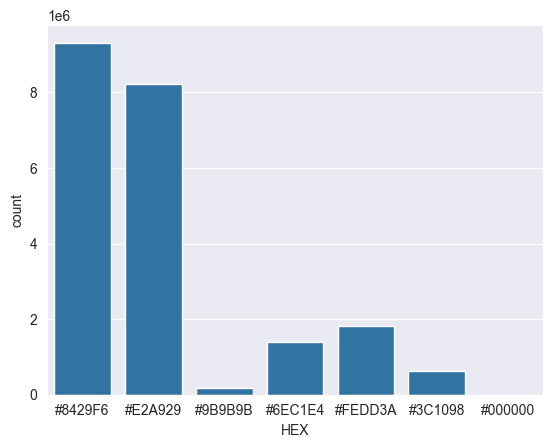

In [33]:
c = pd.DataFrame(train['HEX'])
sns.set_style('darkgrid')
sns.countplot(x="HEX", data=c)

<Axes: xlabel='HEX', ylabel='count'>

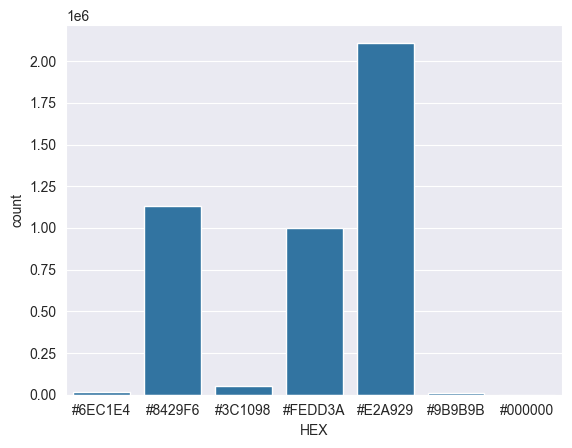

In [34]:
c = pd.DataFrame(test['HEX'])
sns.set_style('darkgrid')
sns.countplot(x="HEX", data=c)

<details><summary>Click <b>here</b> for the solution</summary> <code>
c = pd.DataFrame(test['HEX'])
sns.set_style('darkgrid')
sns.countplot(x="HEX", data=c)
</code></details>


As you can see, the DataSet consist of 6 land use classes. 


The training and test DataSets contain similar distribution of images classes.


# Classification model creation


We will use **[sklearn.linear_model.LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01)** classifier for mask analysis. It is a very fast and simple classifier. In the next lab we will compare different classifiers.

We will use first 3 columns (RGB of image pixel) as imput parameters, and the last column (HEX color of mask picture) as an output.

The **[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01&highlight=logisticregression#sklearn.linear_model.LogisticRegression.fit)** and **[score()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.score)** functions are used for training and evaluating the accuracy.


We will use function **[ConfusionMatrixDisplay.from_estimator()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)** for analysis.


In [35]:
clf = LogisticRegression(max_iter=100, n_jobs=-1)
c = train.columns
clf.fit(train[c[0:3]], train[c[-1:]].values.ravel())

LogisticRegression(n_jobs=-1)

<details><summary>Click <b>here</b> for the solution</summary> <code>
clf = LogisticRegression(max_iter=100, n_jobs=-1)
c = train.columns
clf.fit(train[c[0:3]], train[c[-1:]].values.ravel())
</code></details>


Accuracy train DataSet:  80.2% Accuracy test DataSet:  68.4%


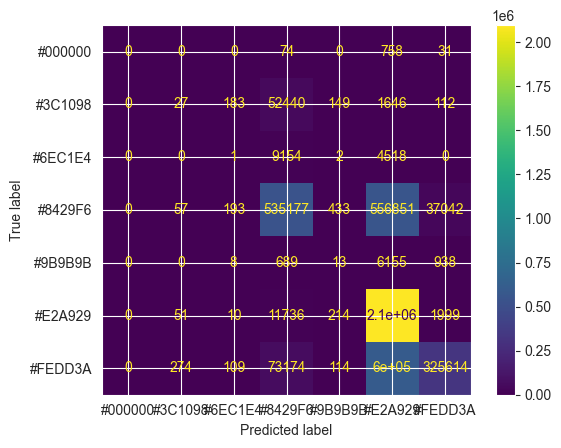

In [36]:
scores_train = clf.score(train[c[0:3]], train[c[-1:]].values.ravel())
scores_test = clf.score(test[c[0:3]], test[c[-1:]].values.ravel())
print('Accuracy train DataSet: {: .1%}'.format(scores_train), 'Accuracy test DataSet: {: .1%}'.format(scores_test))
ConfusionMatrixDisplay.from_estimator(clf, test[c[0:3]], test[c[-1:]].values.ravel())  
plt.show()

As you can see, the accuracy is not bad. The difference between the training and test sets is little. It means that the model is not bad, and for increasing the accuracy we should increase our DataSet. You can test it yourself by adding all the directories with images.


# Create your own mask of land use


Let's build your own mask based on our classifier model.

First of all, you need to choose a few images from the downloaded data list and build your DataSet.


In [37]:
test_image = 8 # choose the number of images from the data list
mask_test = data[test_image:test_image+1] # Test Image + Mask
mask_test_DataSet = create_DataSet(mask_test) #Build a DataSet
print(mask_test_DataSet)

       Im_Red Im_Green Im_Blue Mk_Red Mk_Green Mk_Blue      HEX
0           5       14      11    226      169      41  #E2A929
1           9       18      15    226      169      41  #E2A929
2           1       10       7    226      169      41  #E2A929
3           5       14      11    226      169      41  #E2A929
4           8       17      14    226      169      41  #E2A929
...       ...      ...     ...    ...      ...     ...      ...
513263    183      197     226    132       41     246  #8429F6
513264    189      203     232    132       41     246  #8429F6
513265    191      205     234    132       41     246  #8429F6
513266    187      201     230    132       41     246  #8429F6
513267    181      196     225    132       41     246  #8429F6

[513268 rows x 7 columns]


Then, calculate the hex colour of classes using our model:


In [38]:
c = mask_test_DataSet.columns
mask_test_predict = clf.predict(mask_test_DataSet[c[0:3]])
print(mask_test_predict)

['#E2A929' '#E2A929' '#E2A929' ... '#8429F6' '#8429F6' '#8429F6']


Further, we need to transform the 1D array of colors into a 2D matrix of Hex color using **[numpy.reshape()](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01)**. 


In [39]:
size = mask_test[0][1].size #get original image size
print(size)
predict_img = np.array(mask_test_predict).reshape((size[1], size[0])) #reshaping array of HEX colour
print(predict_img)

(797, 644)
[['#E2A929' '#E2A929' '#E2A929' ... '#8429F6' '#8429F6' '#8429F6']
 ['#E2A929' '#E2A929' '#E2A929' ... '#8429F6' '#8429F6' '#8429F6']
 ['#E2A929' '#E2A929' '#E2A929' ... '#8429F6' '#8429F6' '#8429F6']
 ...
 ['#8429F6' '#8429F6' '#8429F6' ... '#8429F6' '#8429F6' '#8429F6']
 ['#8429F6' '#8429F6' '#8429F6' ... '#8429F6' '#8429F6' '#8429F6']
 ['#8429F6' '#8429F6' '#3C1098' ... '#8429F6' '#8429F6' '#8429F6']]


Than we create a 3D image matrix with an RGB colour map using **[colormap.hex2rgb()](https://pythonhosted.org/colormap/references.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01)**.


In [40]:
rgb_size = np.array(mask_test[0][0]).shape
print("Image size: ", rgb_size)
predict_img_rgb = np.zeros(rgb_size)
for i, r in enumerate(predict_img):
    for j, c in enumerate(r):
        predict_img_rgb[i, j, 0], predict_img_rgb[i, j, 1], predict_img_rgb[i, j, 2] = hex2rgb(c)

Image size:  (644, 797, 3)


<details><summary>Click <b>here</b> for the solution</summary> <code>
rgb_size = np.array(mask_test[0][0]).shape
print("Image size: ", rgb_size)
predict_img_rgb = np.zeros(rgb_size)
for i, r in enumerate(predict_img):
    for j, c in enumerate(r):
        predict_img_rgb[i, j, 0], predict_img_rgb[i, j, 1], predict_img_rgb[i, j, 2] = hex2rgb(c)
</code></details>


Let's compare our mask with the original one.


Model mask


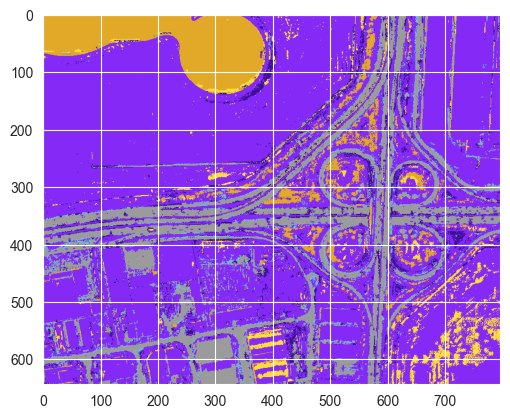

Real mask


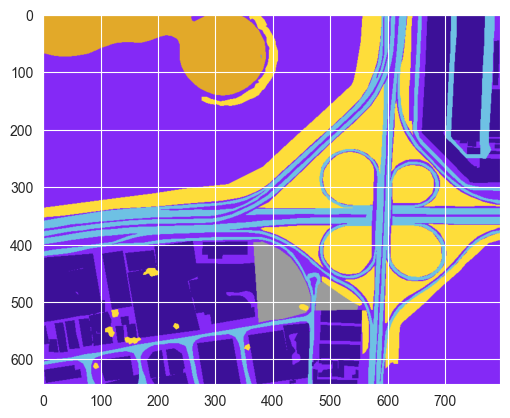

In [41]:
predict_img_rgb = predict_img_rgb.astype('int')
print("Model mask")
plt.imshow(predict_img_rgb)
plt.show()
print("Real mask")
plt.imshow(mask_test[0][1])
plt.show()

You can see that these masks are very similar and you just have to increase the DataSets to improve the accuracy.


## Conclusions


In this lab, we have studied how to create an expert system based on classifiers, which allows to obtain the classification of land, based on aero and satellite images. These principles can be used for any type of images and any types of land use.

In this lab, we have learned to upload and convert images. We have mastered extracting image colors and building / training / testing sets of classifiers. We have calculated the accuracy and studied how to build our own mask based on a classifier.


## Authors


[Yaroslav Vyklyuk, prof., PhD., DrSc](https://author.skills.network/instructors/yaroslav_vyklyuk_2)


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsdatascienceinagriculturelanduseclassification462-2022-01-01).
